#Importaciones

In [1]:
from google.colab import drive;
drive.mount('/content/drive')

import pandas as pd
import numpy as np

# visualización
from pylab import*
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# preprocessing
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer

# clusters models
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage

Mounted at /content/drive


#Cargamos los datos

In [2]:
pd.set_option('display.float_format',lambda x: '%.3f' %x);

tarjetas = pd.read_csv("/content/drive/MyDrive/Datasets/tcrédito.csv", thousands=",");

tarjetas.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,1000.000,201.802,139.510,0.000,12
1,C10002,3202.467,0.909,0.000,0.000,0.000,6442.945,0.000,0.000,0.000,0.250,4,0,7000.000,4103.033,1072.340,0.222,12
2,C10003,2495.149,1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,7500.000,622.067,627.285,0.000,12
3,C10004,1666.671,0.636,1499.000,1499.000,0.000,205.788,0.083,0.083,0.000,0.083,1,1,7500.000,0.000,NaN,0.000,12
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,1200.000,678.335,244.791,0.000,12


#Un primer vistazo a los datos

In [3]:
tarjetas.shape

(8950, 18)

In [4]:
nombre_columnas = tarjetas.columns[1:]
nombre_columnas

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [5]:
tarjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
tarjetas[nombre_columnas].describe()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8949.000,8950.000,8637.000,8950.000,8950.000
mean,1564.475,0.877,1003.205,592.437,411.068,978.871,0.490,0.202,0.364,0.135,3.249,14.710,4494.449,1733.144,864.207,0.154,11.517
std,2081.532,0.237,2136.635,1659.888,904.338,2097.164,0.401,0.298,0.397,0.200,6.825,24.858,3638.816,2895.064,2372.447,0.292,1.338
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000,0.000,0.019,0.000,6.000
25%,128.282,0.889,39.635,0.000,0.000,0.000,0.083,0.000,0.000,0.000,0.000,1.000,1600.000,383.276,169.124,0.000,12.000
50%,873.385,1.000,361.280,38.000,89.000,0.000,0.500,0.083,0.167,0.000,0.000,7.000,3000.000,856.902,312.344,0.000,12.000
75%,2054.140,1.000,1110.130,577.405,468.637,1113.821,0.917,0.300,0.750,0.222,4.000,17.000,6500.000,1901.134,825.485,0.143,12.000
max,19043.139,1.000,49039.570,40761.250,22500.000,47137.212,1.000,1.000,1.000,1.500,123.000,358.000,30000.000,50721.483,76406.208,1.000,12.000


In [7]:
tarjetas.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

##Tratamiento de los nulos

In [8]:
tarjetas.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

El datasets tiene una columna ID que es de tipo objeto, esta columna la podemos eliminar ya que al ser la ID no nos va a aportar nada de infromación. Tenemos 313 datos nulos en la fila de MINIMUN_PAYMENTS y 1 los voy a sustituir por las meianas

In [9]:
tarjetas['CREDIT_LIMIT']=tarjetas['CREDIT_LIMIT'].fillna(value=tarjetas['CREDIT_LIMIT'].std())
tarjetas['MINIMUM_PAYMENTS']=tarjetas['MINIMUM_PAYMENTS'].fillna(value=tarjetas['MINIMUM_PAYMENTS'].std())

In [10]:
tarjetas.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

##Outliers

In [11]:
def detect_col_outliers(ls_tarjetas):
     

    mean = np.mean(ls_tarjetas)
    std = np.std(ls_tarjetas)
   
    return [i for i in ls_tarjetas if np.abs(i-mean) > 4*std]

In [12]:
columnas_outliers = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']
for name_col in columnas_outliers:
    rtdo = detect_col_outliers(tarjetas[name_col])
    print('-'*50)
    print(name_col)
    print('# valor outlier: ', len(rtdo))
    print('{0:.2f}% total de los datos'.format(100*len(rtdo)/tarjetas.shape[0]))

--------------------------------------------------
BALANCE
# valor outlier:  70
0.78% total de los datos
--------------------------------------------------
PURCHASES
# valor outlier:  80
0.89% total de los datos
--------------------------------------------------
ONEOFF_PURCHASES
# valor outlier:  74
0.83% total de los datos
--------------------------------------------------
INSTALLMENTS_PURCHASES
# valor outlier:  79
0.88% total de los datos
--------------------------------------------------
CASH_ADVANCE
# valor outlier:  98
1.09% total de los datos
--------------------------------------------------
CASH_ADVANCE_TRX
# valor outlier:  80
0.89% total de los datos
--------------------------------------------------
PURCHASES_TRX
# valor outlier:  95
1.06% total de los datos
--------------------------------------------------
CREDIT_LIMIT
# valor outlier:  29
0.32% total de los datos
--------------------------------------------------
PAYMENTS
# valor outlier:  92
1.03% total de los datos
---

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

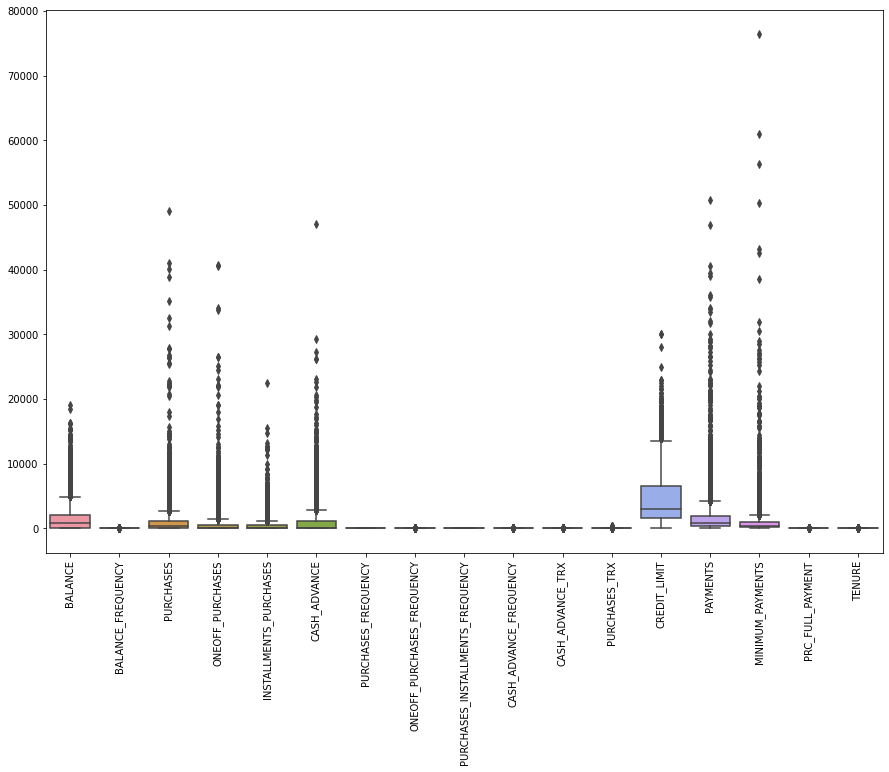

In [13]:

plt.figure(figsize=(15,10))
sns.boxplot(data=tarjetas[nombre_columnas])
plt.xticks(rotation=90)

##Transformacción de columnas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

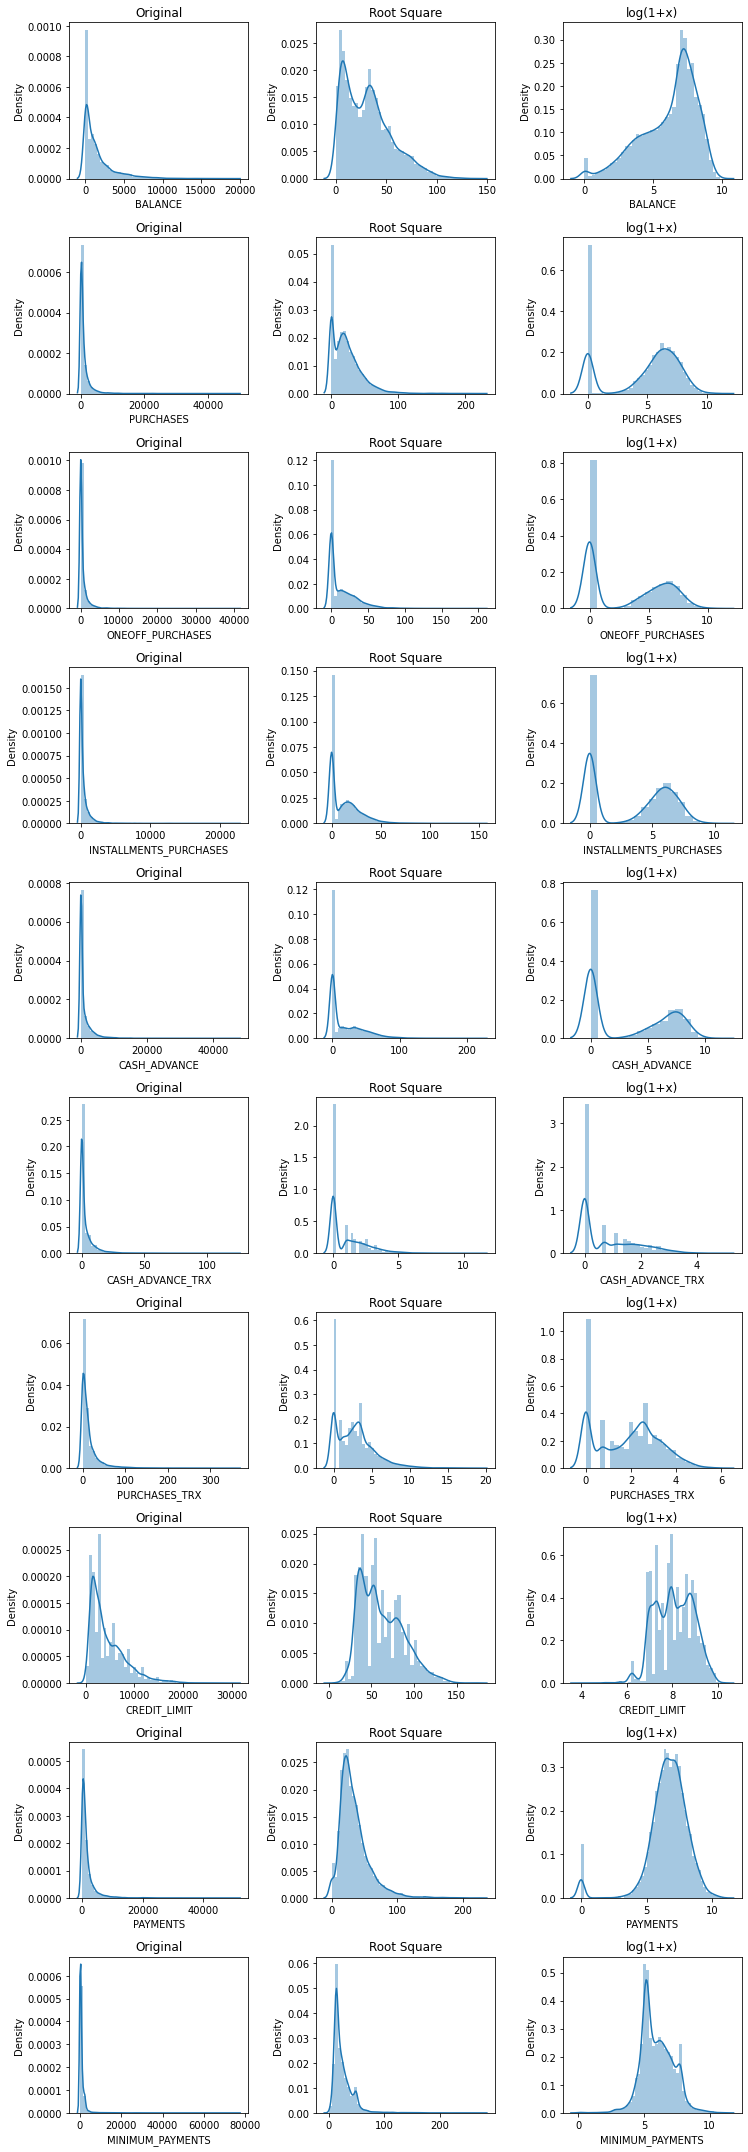

In [14]:


nr_rows = len(columnas_outliers)
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r, col in enumerate(columnas_outliers):
    sns.distplot(tarjetas[col], ax = axs[r][0]).set_title('Original')
    sns.distplot(np.sqrt(tarjetas[col].tolist()), ax = axs[r][1]).set_title("Root Square")
    sns.distplot(np.log1p(tarjetas[col]), ax = axs[r][2]).set_title('log(1+x)')
plt.tight_layout()    
plt.show()  



Hay 10 columnas que pueden dar problemas con los outliers:
    BALANCE,
    PURCHASES,
    ONEOFF_PURCHASES,
    INSTALLMENTS_PURCHASES,
    CASH_ADVANCE,
    CASH_ADVANCE_TRX,
    PURCHASE_TRX,
    CREDIT_LIMIT,
    PAYMENTS and
    MINIMUM_PAYMENTS

Voy a probar transformando estas variables

##Tratamiento de varibles discretas

In [15]:
int_cols = tarjetas[nombre_columnas].select_dtypes(include=['int']).columns
int_cols

Index(['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE'], dtype='object')

In [16]:
for col in int_cols:
    print(tarjetas[col].value_counts().sort_values(ascending=False))
    print('-'*30)

0     4628
1      887
2      620
3      436
4      384
      ... 
93       1
80       1
61       1
69       1
41       1
Name: CASH_ADVANCE_TRX, Length: 65, dtype: int64
------------------------------
0      2044
1       667
12      570
2       379
6       352
       ... 
344       1
199       1
222       1
254       1
186       1
Name: PURCHASES_TRX, Length: 173, dtype: int64
------------------------------
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64
------------------------------


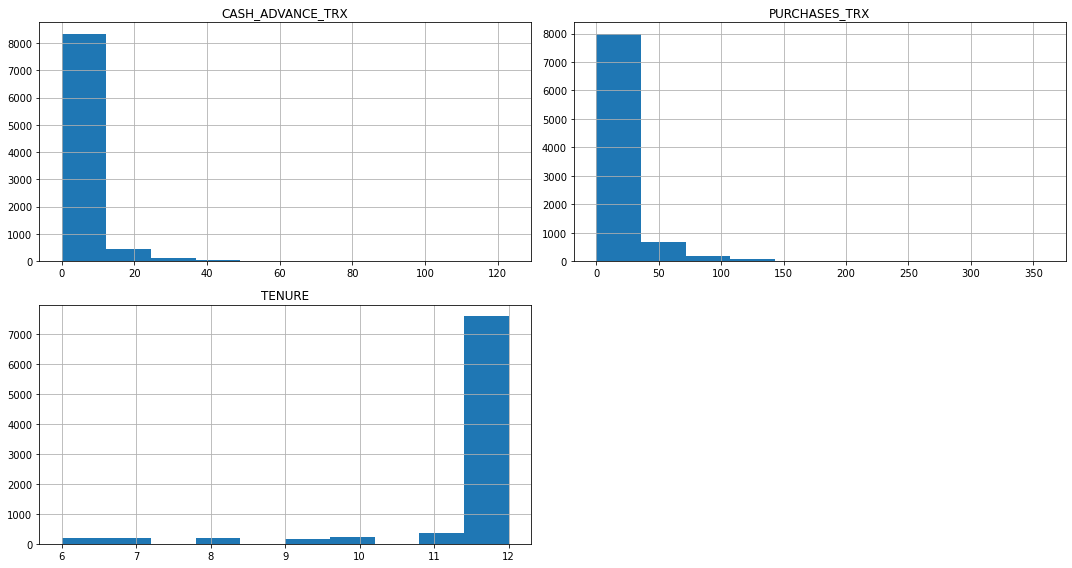

In [17]:
tarjetas[int_cols].hist(figsize=(15,8))
plt.tight_layout()

##Matriz de correlación

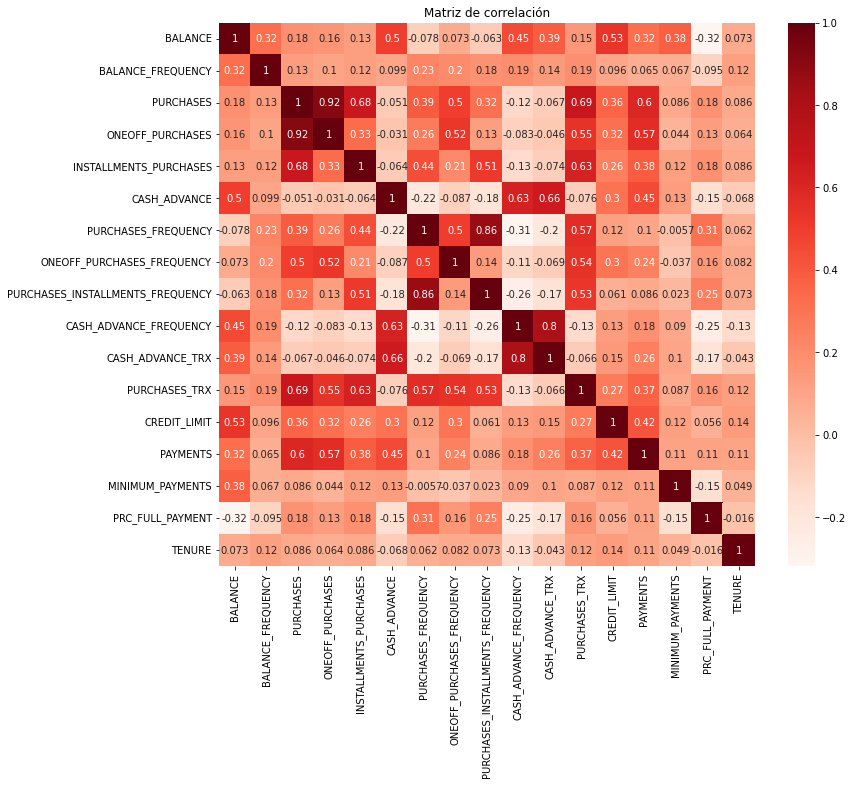

In [18]:
plt.figure(figsize=(12,10))
corr_m = tarjetas[nombre_columnas].corr()
sns.heatmap(corr_m, annot=True, cmap=plt.cm.Reds).set_title('Matriz de correlación')
plt.show()



PURCHASES tiene una mayor correlación con ONEOFF_PURCHASES.
CASH_ADVANCE_TRX tiene una mayor correlación con CASH_ADVANCE_FREQUENCY.
PURCHASES_TRX tiene una buena correlación con INSTALLMENTS_PURCHASES PURCHASES_FREQUENCY.
BALANCE tiene una corelación negativa con PRC_FULL_PAYMENT



##Analizamos Purchases

In [19]:
cor_purchases = abs(corr_m["PURCHASES"])
cor_purchases[cor_purchases>0.5].sort_values(ascending=False)

PURCHASES                1.000
ONEOFF_PURCHASES         0.917
PURCHASES_TRX            0.690
INSTALLMENTS_PURCHASES   0.680
PAYMENTS                 0.603
Name: PURCHASES, dtype: float64

In [20]:
print('{0:.2f}%'.format(100*sum(tarjetas.PURCHASES == tarjetas.ONEOFF_PURCHASES + tarjetas.INSTALLMENTS_PURCHASES)/tarjetas.shape[0]))

94.50%


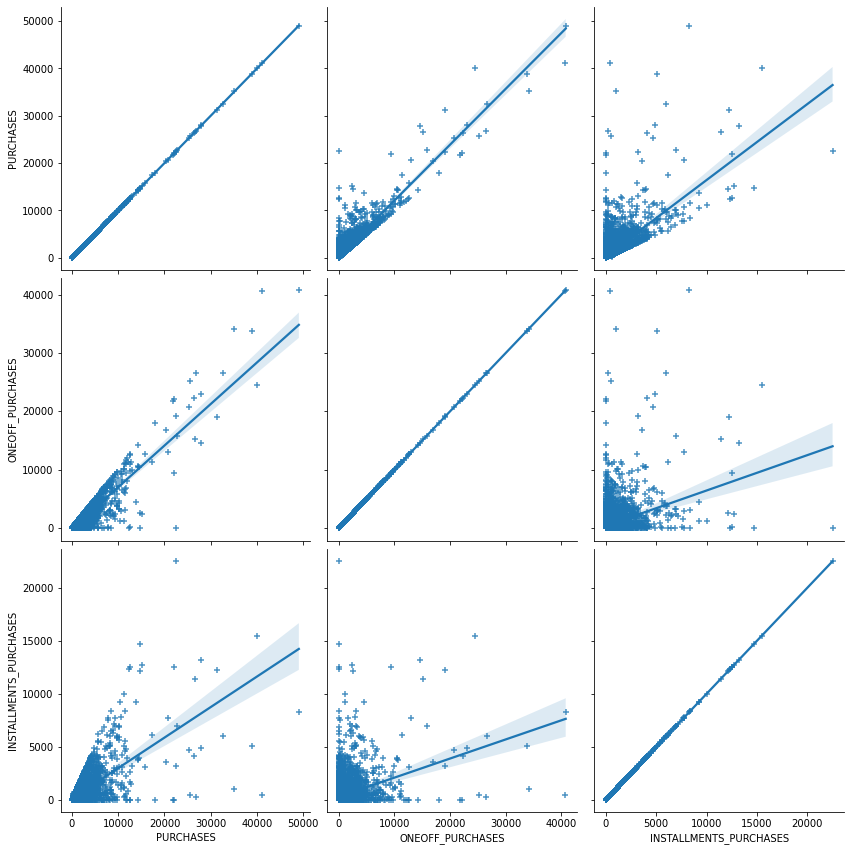

In [21]:
sns.pairplot(tarjetas[['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']],
             markers="+",
             kind='reg',
             diag_kind=None, 
             height=4)

##Analizamos CASH_ADVANCE

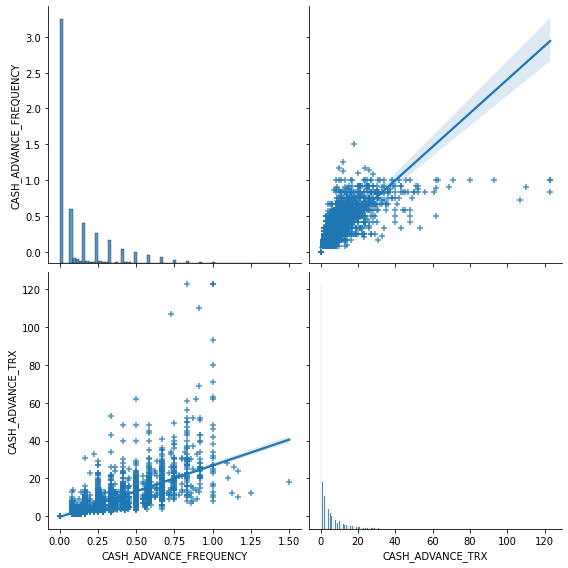

In [22]:
sns.pairplot(tarjetas[['CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX']],
             markers="+",
             kind='reg',
             height=4)

##Procesado de datos

In [23]:
nombre_columnas = tarjetas.columns[1:]
nombre_columnas1 = ['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','PAYMENTS','CREDIT_LIMIT','MINIMUM_PAYMENTS']
nombre_columnas2 = list(set(nombre_columnas)-set(nombre_columnas1))

In [24]:
# utilizando la mediana en las columnas con outliers
g1_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p)),
    #('scaler', MinMaxScaler(feature_range=(0, 1)))
    ('scaler', StandardScaler())
    ])

# utilizando la mediana en las columnas sin outliers 
g2_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('group1', g1_transformer, nombre_columnas1),
        ('group2', g2_transformer, nombre_columnas2),
        ])

##Análisis de procesado

In [25]:
preprocessor.fit(tarjetas) 
np_tarjetas = preprocessor.transform(tarjetas) 
print(np_tarjetas[np.isnan(np_tarjetas)])
df_tarjetas = pd.DataFrame(np_tarjetas, columns=nombre_columnas1+nombre_columnas2)
print(df_tarjetas.isna().sum())
print(df_tarjetas.shape)
df_tarjetas.head(6)

[]
BALANCE                             0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
CREDIT_LIMIT                        0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
CASH_ADVANCE_FREQUENCY              0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
PURCHASES                           0
BALANCE_FREQUENCY                   0
PURCHASES_INSTALLMENTS_FREQUENCY    0
TENURE                              0
dtype: int64
(8950, 17)


,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,CASH_ADVANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES,BALANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,TENURE
0,-1.205,-0.987,0.394,-0.931,-0.810,-0.580,-0.824,-1.447,-0.855,-0.526,-0.675,-0.679,-0.806,-0.425,-0.249,-0.707,0.361
1,0.949,-0.987,-1.087,1.529,0.785,-1.379,1.065,0.926,0.814,0.234,0.574,-0.679,-1.222,-0.470,0.134,-0.917,0.361
2,0.825,1.062,-1.087,-0.931,-0.810,0.488,-0.119,1.010,0.375,-0.526,-0.675,2.673,1.270,-0.108,0.518,-0.917,0.361
3,0.625,1.266,-1.087,0.564,-0.123,-0.875,-4.162,1.010,1.466,-0.526,-0.259,-0.399,-1.014,0.232,-1.017,-0.917,0.361
4,0.271,-0.114,-1.087,-0.931,-0.810,-0.875,-0.065,-1.225,-0.396,-0.526,-0.675,-0.399,-1.014,-0.462,0.518,-0.917,0.361
5,0.666,-0.987,1.247,-0.931,-0.810,0.220,0.390,-0.731,1.478,-0.526,-0.675,-0.679,0.439,0.154,0.518,0.551,0.361


##PCA

In [26]:


pca = PCA(n_components=2)
pca.fit(np_tarjetas)



PCA(n_components=2)

Text(0, 0.5, 'Second Principal Component')

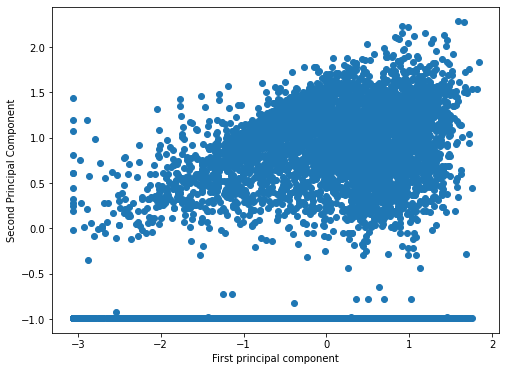

In [27]:


tarjetas_pca = pca.transform(np_tarjetas)
plt.figure(figsize=(8,6))
plt.scatter(np_tarjetas[:,0],np_tarjetas[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')



In [28]:


print(pca.noise_variance_)
print(pca.explained_variance_ratio_)



0.5358081539016426
[0.31010141 0.21717951]


##Método del codo

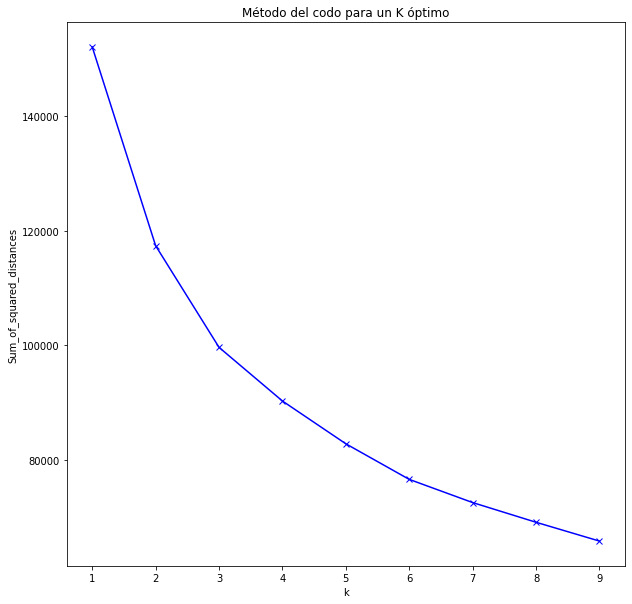

In [29]:


Sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, 
                init='k-means++',
                max_iter=400, 
                n_init=80, 
                random_state=0).fit(np_tarjetas)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(10,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Método del codo para un K óptimo')
plt.show()



##Coeficiente de silhoute

Para n_clusters = 2 El silhouette_score is : 0.2279939092452055
Para n_clusters = 3 El silhouette_score is : 0.2169210593759296
Para n_clusters = 4 El silhouette_score is : 0.21061525222931674
Para n_clusters = 5 El silhouette_score is : 0.21037944554357962
Para n_clusters = 6 El silhouette_score is : 0.20753497742874763
Para n_clusters = 7 El silhouette_score is : 0.21163061780522682
Para n_clusters = 8 El silhouette_score is : 0.20326137644717754
Para n_clusters = 9 El silhouette_score is : 0.17144679052074677


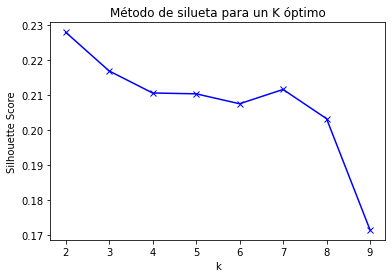

In [30]:


silhouette_scores = [] 
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=45).fit_predict(np_tarjetas)
    scr = silhouette_score(np_tarjetas, km)
    silhouette_scores.append(scr)
    print("Para n_clusters =", k, "El silhouette_score is :", scr)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Método de silueta para un K óptimo')
plt.show()



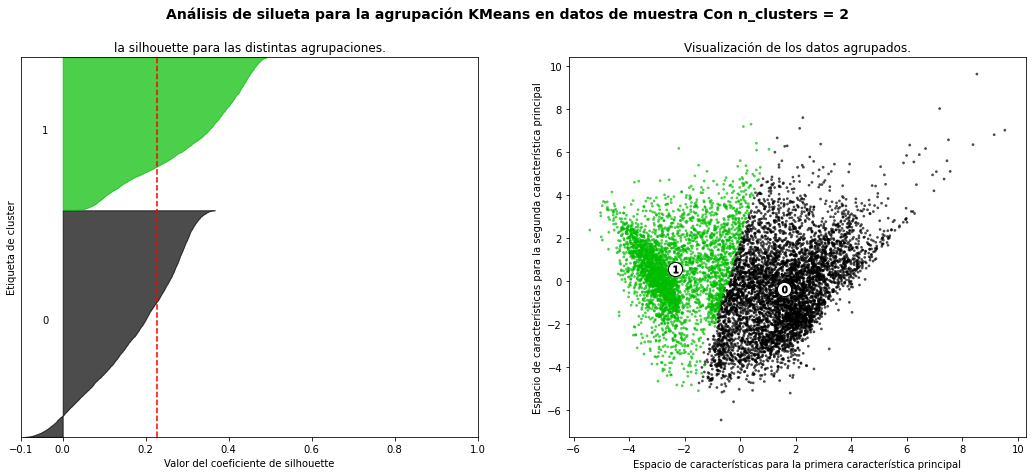

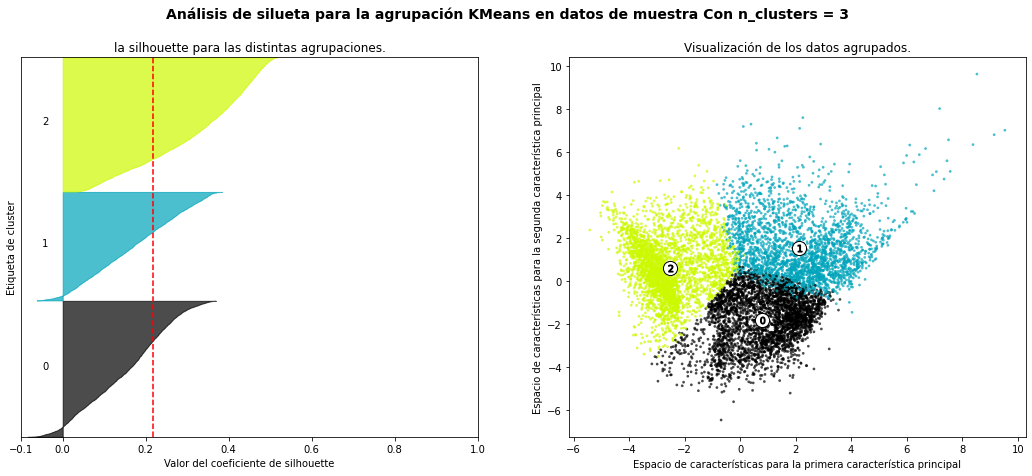

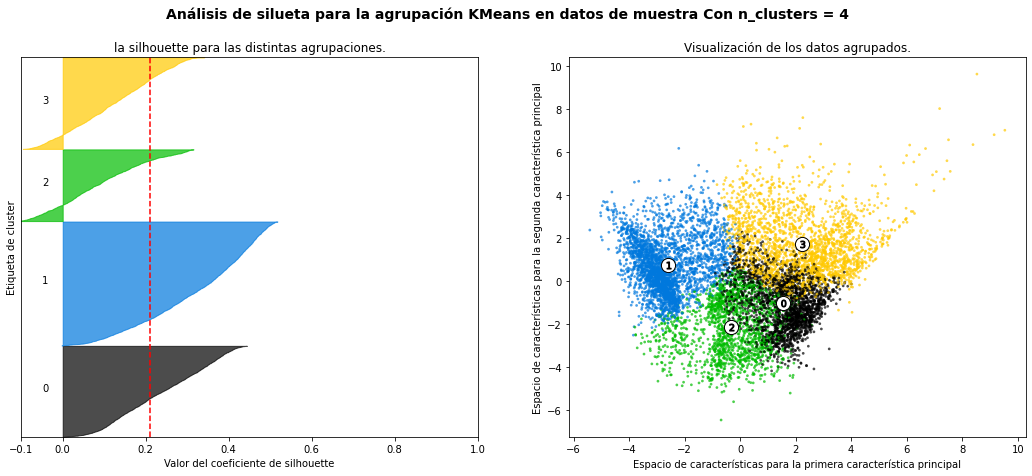

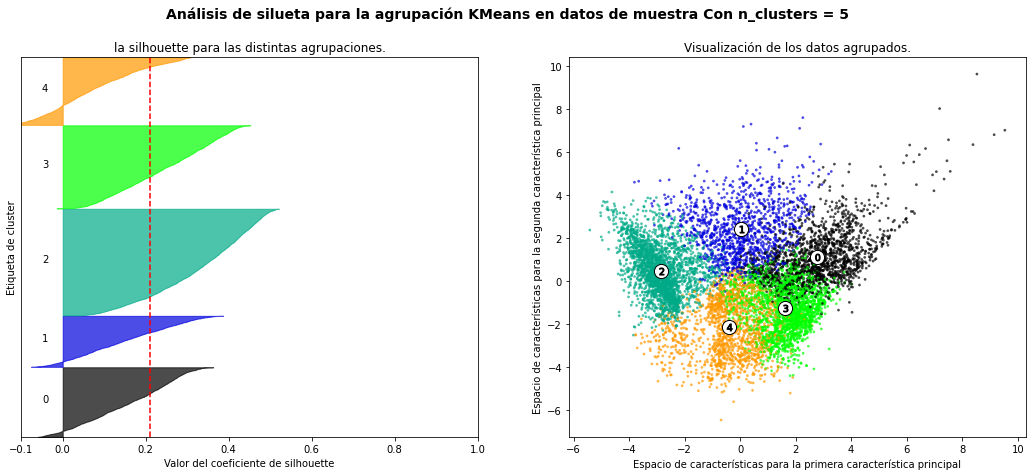

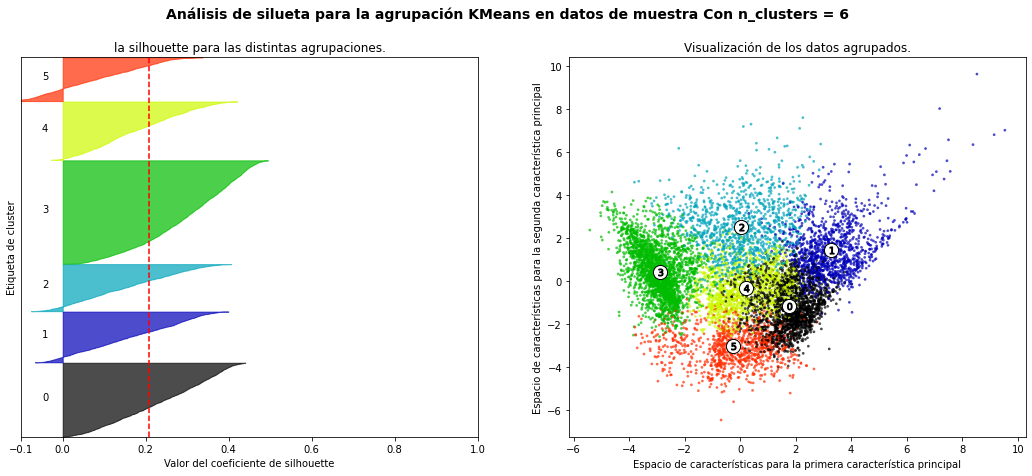

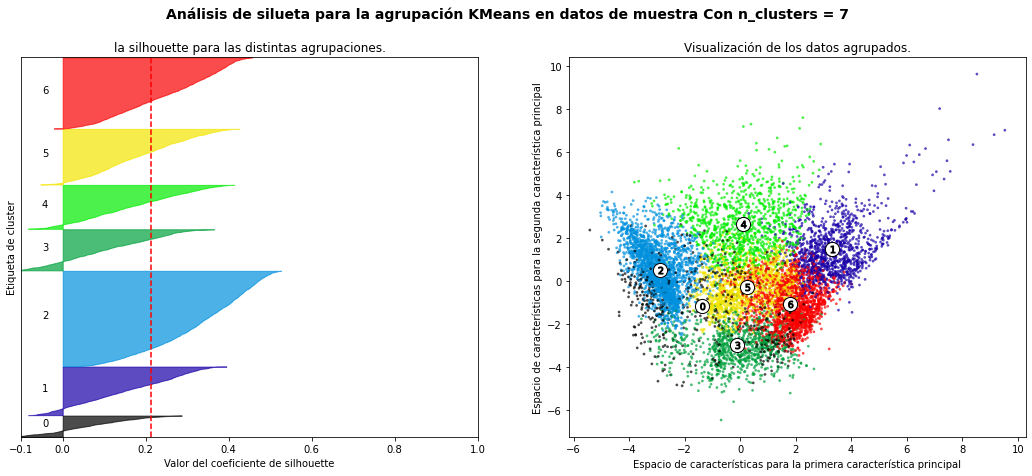

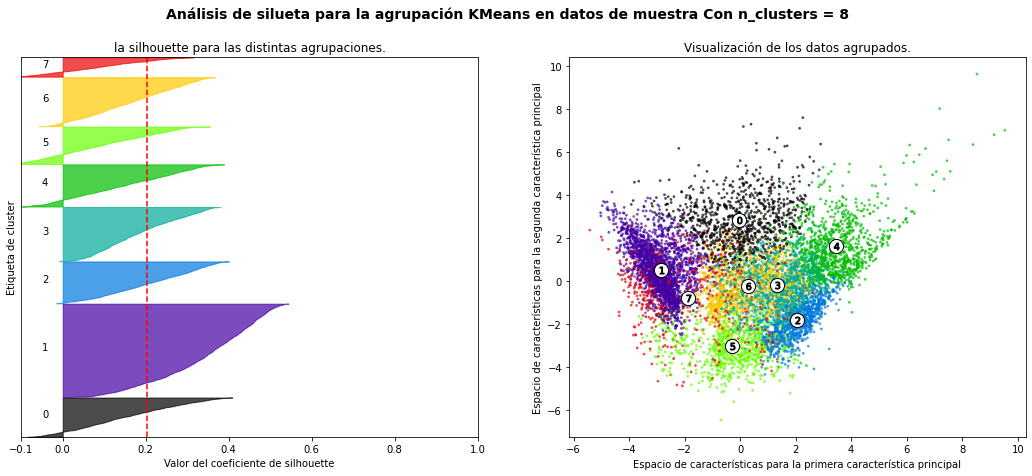

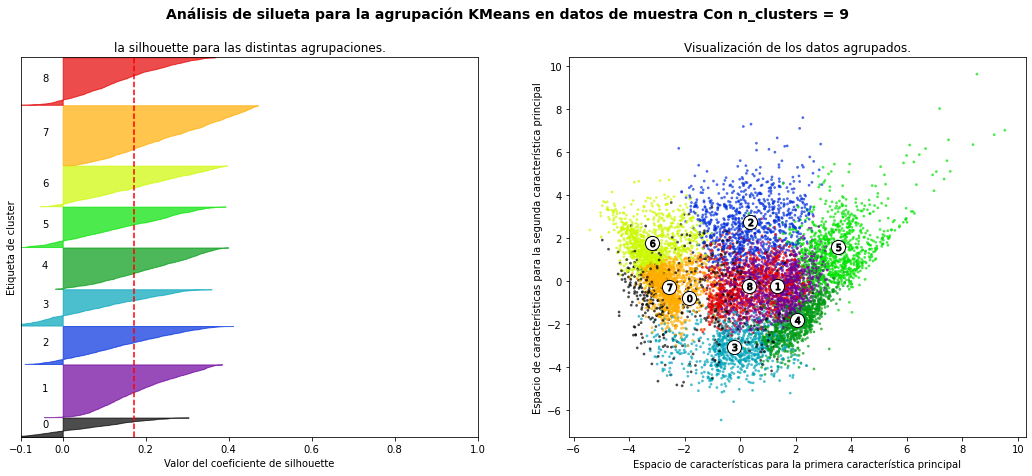

In [31]:
K = range(2,10)

for k in K:
    # Crear un subplot con 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # El primer subplot es la de las siluetas
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np_tarjetas) + (k + 1) * 10])

    clusterer = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=45)
    cluster_labels = clusterer.fit_predict(np_tarjetas)

    silhouette_avg = silhouette_score(np_tarjetas, cluster_labels)

    # Calcular las puntuaciones de la silueta para cada muestra
    sample_silhouette_values = silhouette_samples(np_tarjetas, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Agregar las puntuaciones de las siluetas de las muestras que pertenecen al clúster i y ordénelas
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("la silhouette para las distintas agrupaciones.")
    ax1.set_xlabel("Valor del coeficiente de silhouette")
    ax1.set_ylabel("Etiqueta de cluster")

    # La línea vertical para la puntuación media de la silueta de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot mostrando las agrupaciones reales formadas
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    pca = PCA(n_components=2)
    pca.fit(np_tarjetas)
    X = pca.transform(np_tarjetas)

    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Etiquetado de clusters
    pca_centers = pca.transform(clusterer.cluster_centers_)
    # Dibujar círculos blancos en los centros de los racimos
    ax2.scatter(pca_centers[:, 0], pca_centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(pca_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualización de los datos agrupados.")
    ax2.set_xlabel("Espacio de características para la primera característica principal")
    ax2.set_ylabel("Espacio de características para la segunda característica principal")

    plt.suptitle(("Análisis de silueta para la agrupación KMeans en datos de muestra "
                  "Con n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

##Distribucción en los clústers

In [32]:
km = KMeans(n_clusters=6, 
            init='k-means++',
            max_iter=300, 
            n_init=80, 
            random_state=0)

km_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('km', km)])

km_pipe.fit(tarjetas)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('group1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['BALANCE',
                                                   'ONEOFF_PURCHASES',
                                                   'INSTALLMENTS_PURCHASES',
                                                   'CASH_ADVANCE',
                                                   'CASH_ADVANCE_TRX',
                             

In [33]:
labels = km.labels_

In [34]:


clusters = pd.concat([tarjetas, pd.DataFrame({'CLUSTER':labels})], axis=1)
clusters.head()



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,1000.000,201.802,139.510,0.000,12,0
1,C10002,3202.467,0.909,0.000,0.000,0.000,6442.945,0.000,0.000,0.000,0.250,4,0,7000.000,4103.033,1072.340,0.222,12,4
2,C10003,2495.149,1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,7500.000,622.067,627.285,0.000,12,3
3,C10004,1666.671,0.636,1499.000,1499.000,0.000,205.788,0.083,0.083,0.000,0.083,1,1,7500.000,0.000,2372.447,0.000,12,3
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,1200.000,678.335,244.791,0.000,12,3


In [35]:
clusters.CLUSTER.value_counts()

4    2451
2    1774
3    1373
5    1199
1    1113
0    1040
Name: CLUSTER, dtype: int64

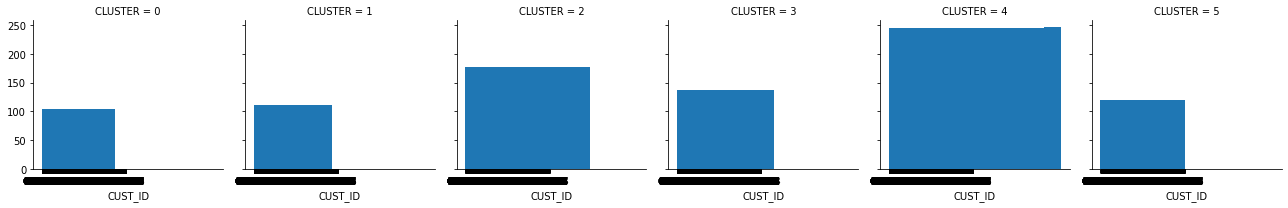

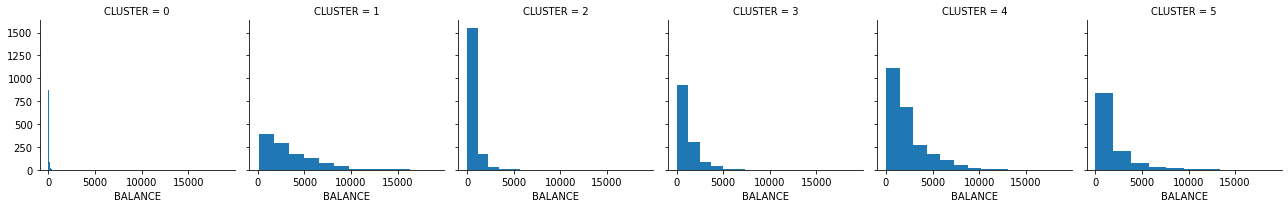

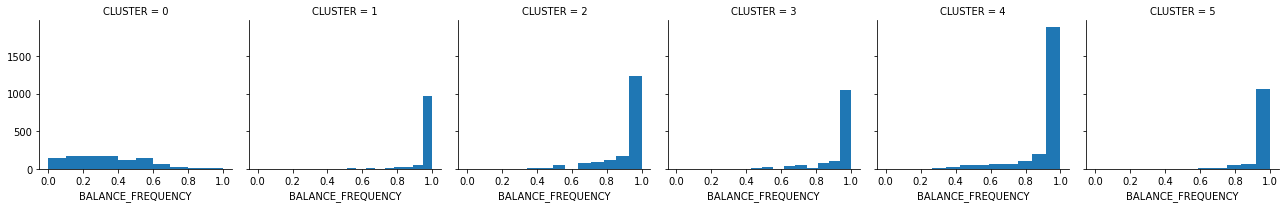

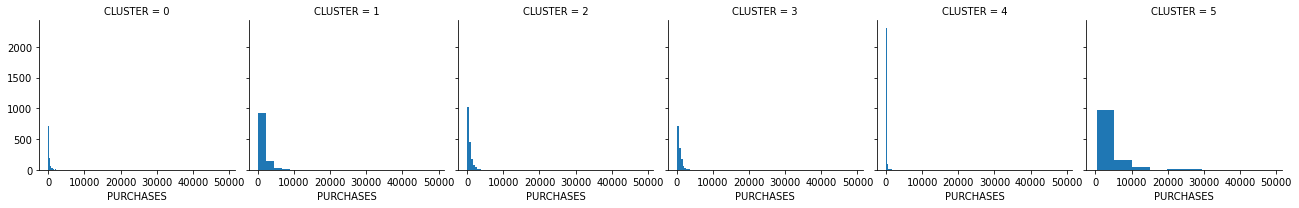

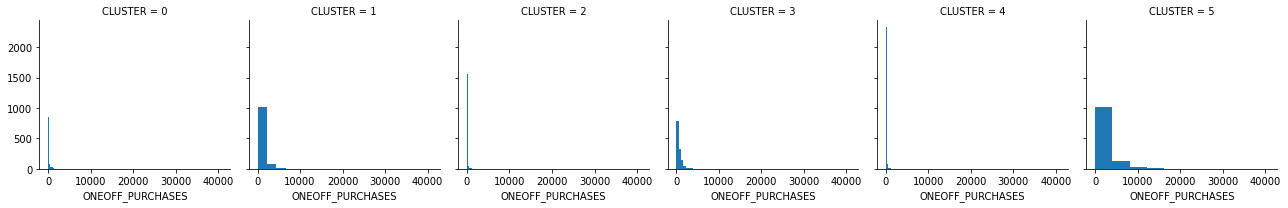

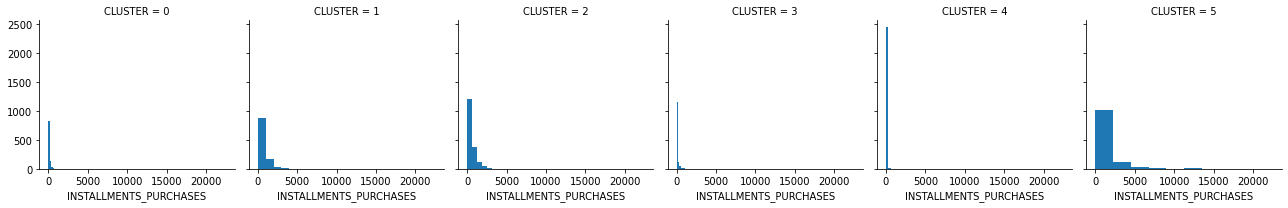

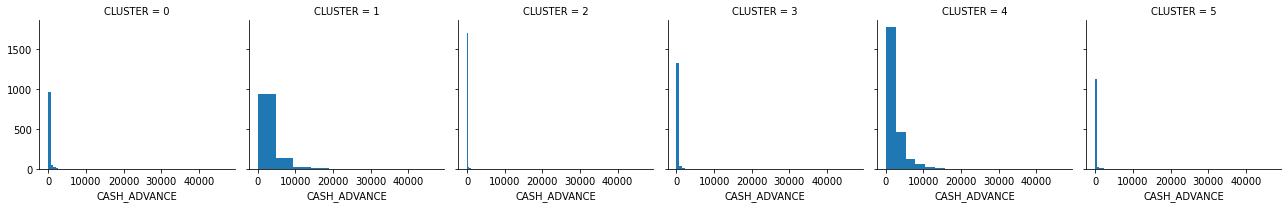

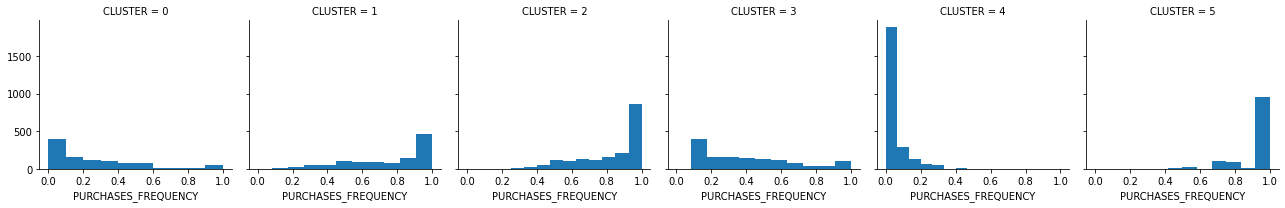

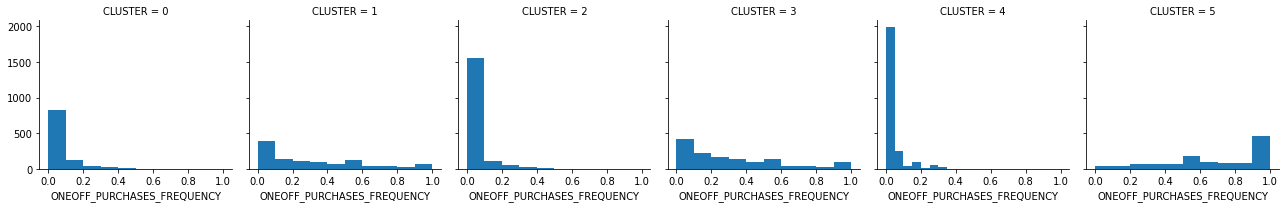

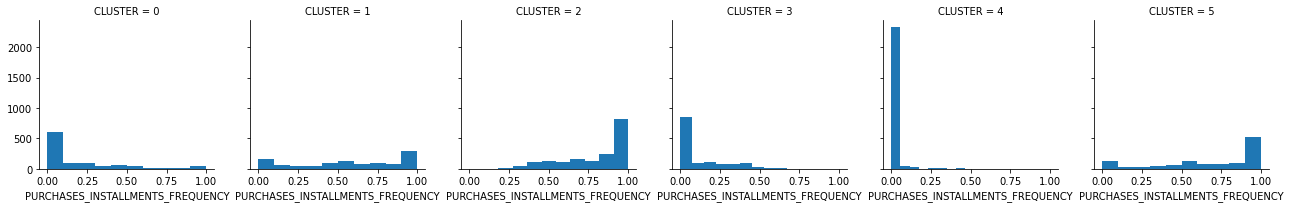

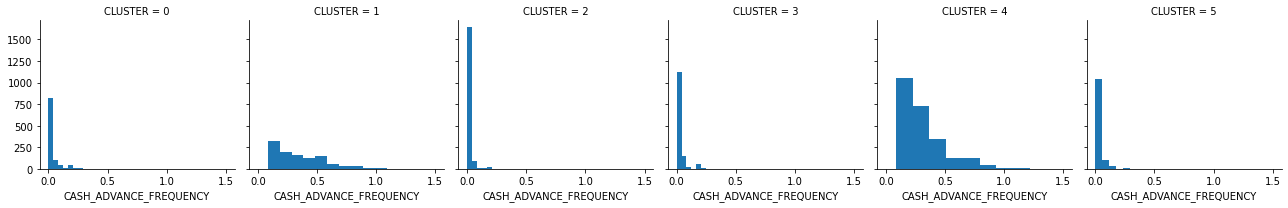

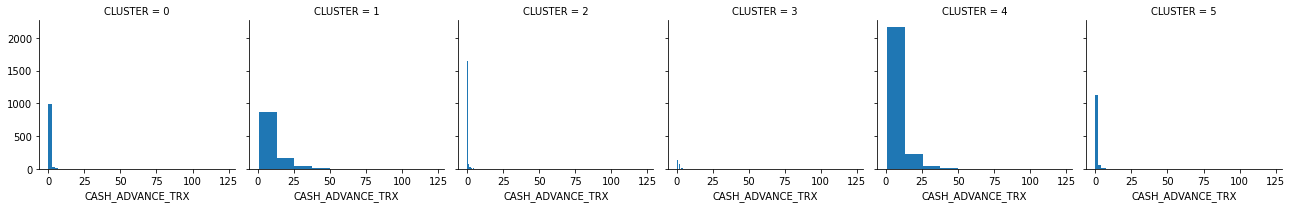

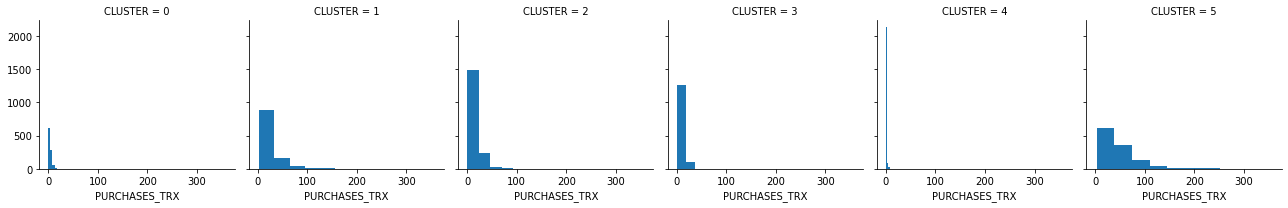

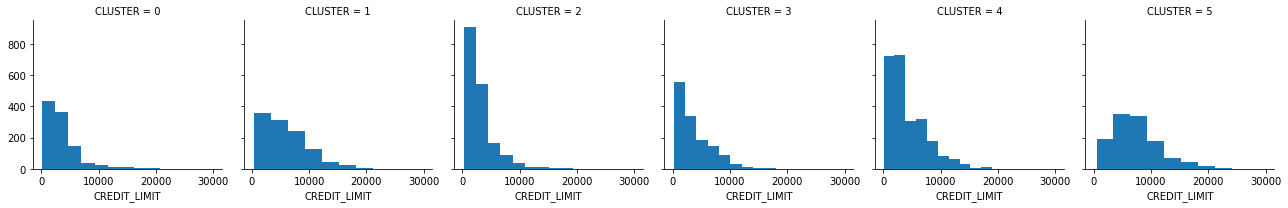

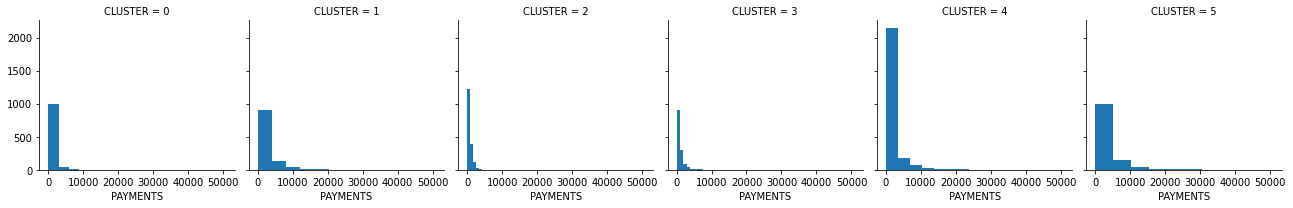

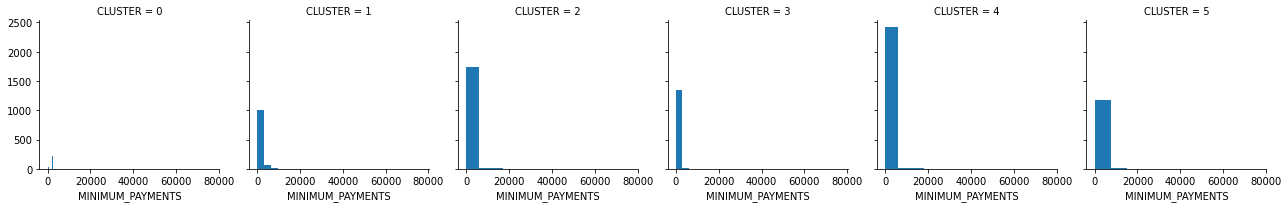

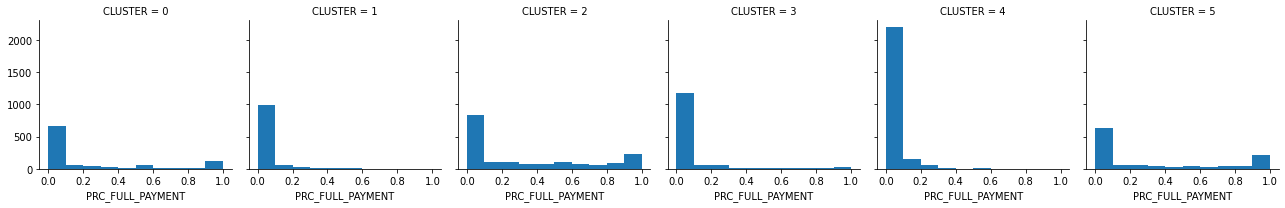

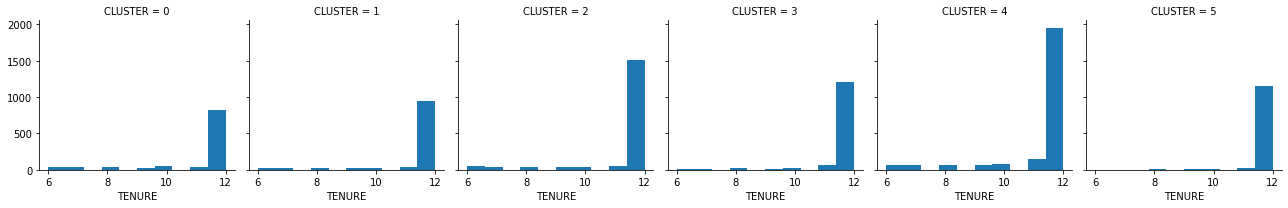

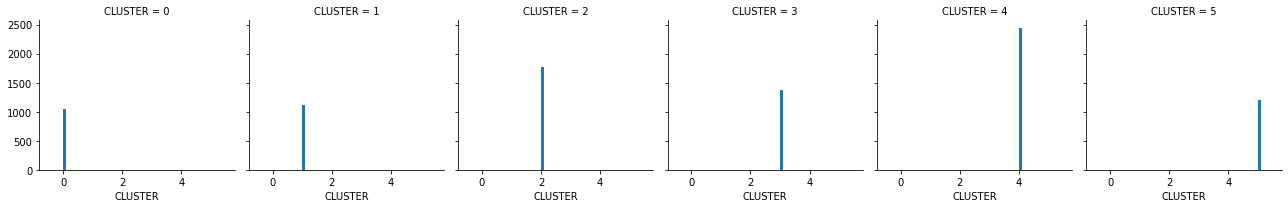

In [36]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='CLUSTER')
    grid.map(plt.hist, c)

##Explicación de los clústers

In [37]:

clusters.groupby(['CLUSTER']).mean()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER,,,,,,,,,,,,,,,,,
0,40.122,0.343,252.555,145.151,107.689,159.017,0.260,0.065,0.183,0.026,0.464,3.752,3542.813,772.825,569.299,0.209,11.264
1,3397.085,0.979,1418.816,776.649,642.455,2792.587,0.760,0.311,0.583,0.358,9.648,24.288,5908.401,2996.534,1595.874,0.039,11.508
2,436.159,0.926,689.524,60.512,629.841,34.345,0.847,0.040,0.801,0.009,0.135,15.836,3024.600,808.669,682.889,0.323,11.477
3,1128.204,0.945,725.028,646.773,78.601,79.877,0.403,0.317,0.101,0.022,0.312,8.130,3914.273,1001.415,705.740,0.063,11.676
4,2355.101,0.936,58.792,51.939,6.902,2127.983,0.038,0.026,0.010,0.294,6.891,0.558,4221.224,1713.516,1084.918,0.030,11.383
5,1738.319,0.978,3981.741,2639.095,1342.645,84.308,0.938,0.690,0.699,0.016,0.249,50.121,7404.280,3639.206,833.100,0.320,11.898


Clúster 0: Nivel de ingresos bajo. Compras poco frecuentes 

Clúster 1: Alto nivel de ingresos y alto límite de crédito que piden dinero en efectivo por adelantado 

Clúster 2: Compra sobre todo a plazos

Clúster 3: Compran mayoritariamente en una sola vez con una alta frecuencia. el porcentaje de pago completo es bajo (compra a plazos) 

Clúster 4: No gastan mucho dinero y piden grandes cantidades de anticipos en efectivo, pero no con frecuencia

Clúster 5: Los que gastan mucho y con el límite de crédito más alto

In [38]:


dist = 1 - cosine_similarity(np_tarjetas)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape



(8950, 2)

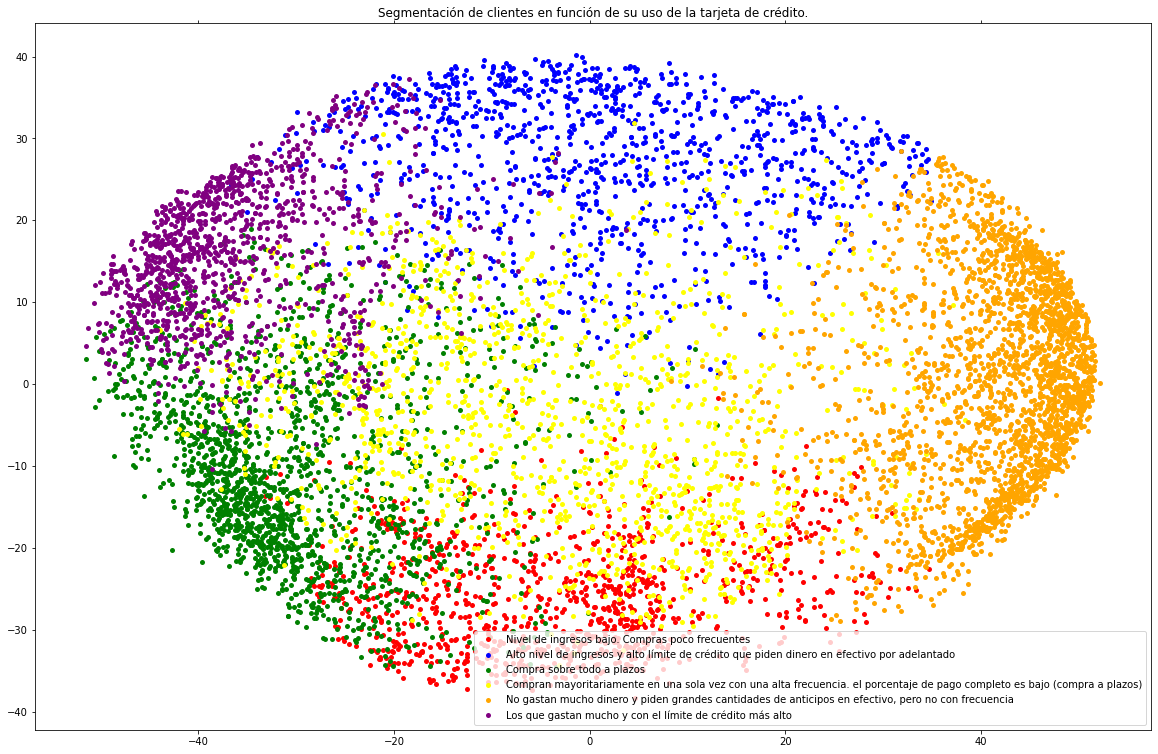

In [39]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'Nivel de ingresos bajo. Compras poco frecuesntes ', 
         1: 'Alto nivel de ingresos y alto límite de crédito que piden dinero en efectivo por adelantado', 
         2: 'Compra sobre todo a plazos', 
         3: 'Compran mayoritariamente en una sola vez con una alta frecuencia. el porcentaje de pago completo es bajo (compra a plazos)', 
         4: 'No gastan mucho dinero y piden grandes cantidades de anticipos en efectivo, pero no con frecuencia',
         5: 'Los que gastan mucho y con el límite de crédito más alto'}
  


df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Segmentación de clientes en función de su uso de la tarjeta de crédito.")
plt.show()

ValueError: ignored

#plot en 3D

In [ ]:
!pip install --upgrade plotly

In [ ]:
!pip install jupyter-dash

     |████████████████████████████████| 9.6 MB 5.5 MB/s 
     |████████████████████████████████| 357 kB 38.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=b2d11a2b7ed9c8bdbed50c305fb24e0974d617850dd6dae0fd5f27dfcf54f4f5
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


IndexError: ignored

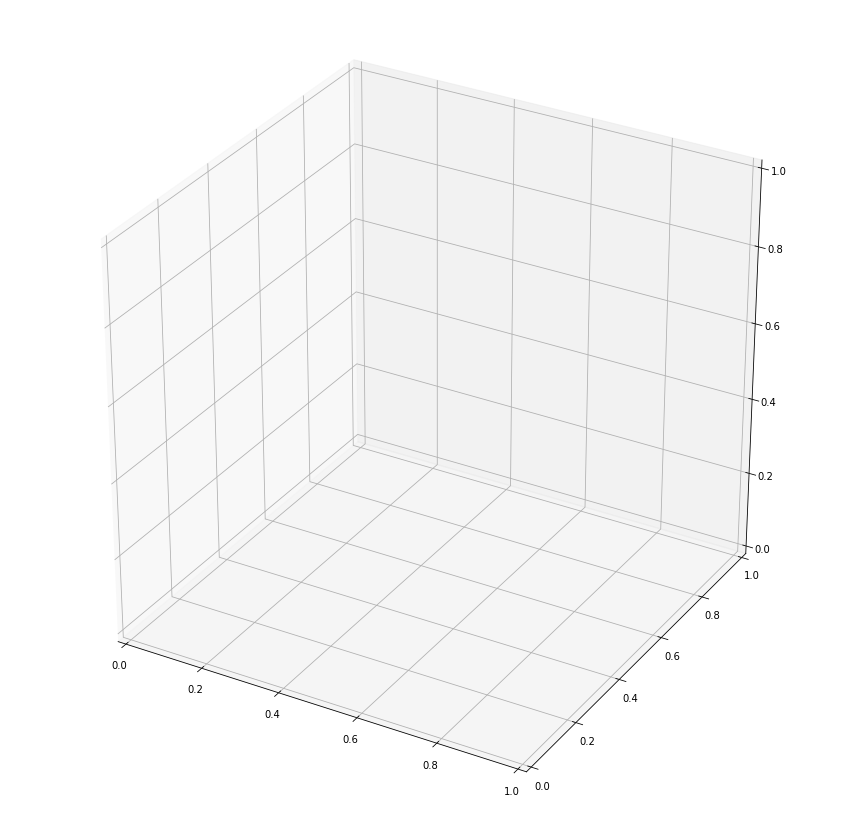

In [ ]:
import plotly.express as px;

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[clusters == 0,0],x[clusters == 0,1],x[clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[clusters == 1,0],x[clusters == 1,1],x[clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[clusters == 2,0],x[clusters == 2,1],x[clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[clusters == 3,0],x[clusters == 3,1],x[clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[clusters == 4,0],x[clusters == 4,1],x[clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(x[clusters == 5,0],x[clusters == 5,1],x[clusters == 5,2], s = 40 , color = 'red', label = "cluster 5")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()